### Generation

**np.random()**

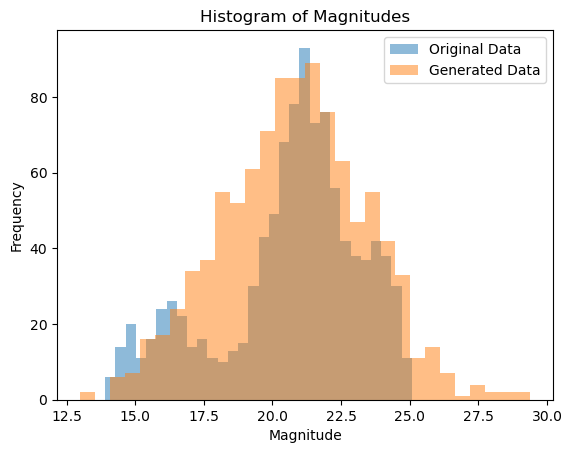

T-statistic: -1.31620843047356
P-value: 0.1882534277903611
KS-statistic: 0.08070645792563601
KS-p-value: 0.0025514322768476114


In [ ]:
# Compute mean and covariance of the original data
mean_mb = np.mean(mb)
std_mb = np.std(mb)

# For a univariate case, covariance matrix is just the variance
cov = std_mb**2
cov_inv = np.linalg.inv(np.array([[cov]]))

# Generate new data points
num_samples = 1000  # Number of new samples to generate
new_mb_samples = np.random.multivariate_normal([mean_mb], [[cov]], num_samples)

mb=np.array(mb).flatten()
new_mb_samples=np.array(new_mb_samples).flatten()

plt.hist(mb, bins=30, alpha=0.5, label='Original Data')
plt.hist(new_mb_samples, bins=30, alpha=0.5, label='Generated Data')
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitudes')
plt.show()

from scipy import stats

t_stat, p_value = stats.ttest_ind(mb, new_mb_samples)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.ks_2samp(mb, new_mb_samples)
print("KS-statistic:", ks_statistic)
print("KS-p-value:", ks_p_value)


**KDE**

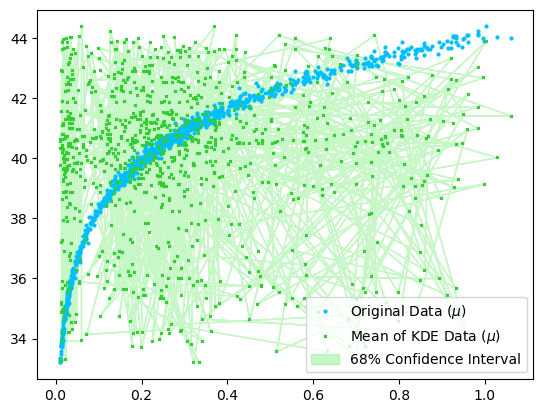

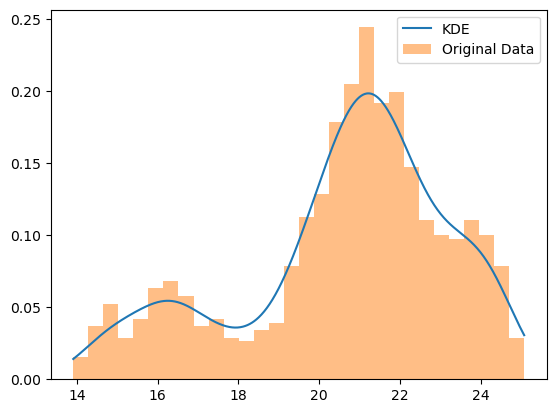

In [ ]:
from scipy.stats import gaussian_kde

def generate_new_data_using_kde(mb, num_samples):
    kde = gaussian_kde(mb,bw_method=0.0001)
    new_data = kde.resample(num_samples)
    return new_data.flatten()

# Generate new magnitudes using KDE
num_samples = len(mu_data)
new_mb = generate_new_data_using_kde(mb, num_samples)

# Compute new distance modulus
new_mu = new_mb - M

# Plot the results
plt.plot(z_data, mu_data, 'o', markersize=2, color='deepskyblue', label='Original Data ($\mu$)')
plt.plot(z_data, new_mu, 'x', markersize=2, color='limegreen', label='Mean of KDE Data ($\mu$)')
plt.fill_between(z_data, np.percentile(new_mu.reshape(-1, len(z_data)), 16, axis=0), np.percentile(new_mu.reshape(-1, len(z_data)), 84, axis=0), color='lightgreen', alpha=0.5, label='68% Confidence Interval')
plt.legend()
plt.show()

kde = gaussian_kde(mb)
x = np.linspace(min(mb), max(mb), 1000)
plt.plot(x, kde(x), label='KDE')
plt.hist(mb, bins=30, density=True, alpha=0.5, label='Original Data')
plt.legend()
plt.show()

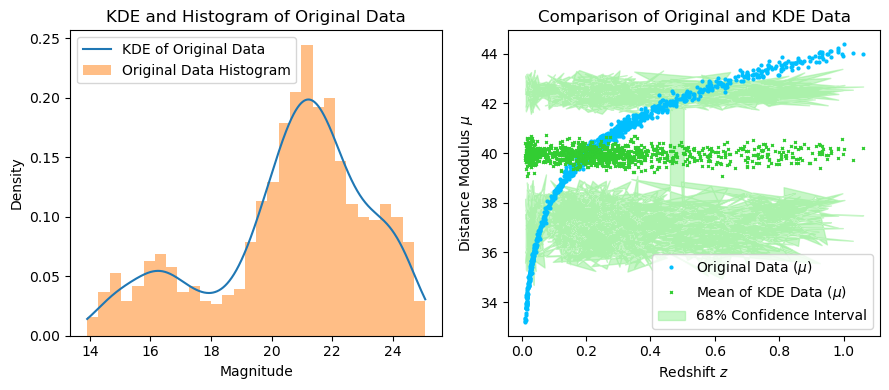

In [ ]:
# Function to generate new data using KDE
def generate_new_data_using_kde(mb, num_samples):
    kde = gaussian_kde(mb)
    new_data = kde.resample(num_samples)
    return new_data.flatten()

# Generate multiple sets of new magnitudes using KDE
num_samples = len(mb)  # Number of samples for KDE should match the number of original data points
num_simulations = 100  # Number of realizations for confidence intervals

# Collect new mu values
all_new_mu = np.zeros((num_simulations, num_samples))

for i in range(num_simulations):
    new_mb = generate_new_data_using_kde(mb, num_samples)
    all_new_mu[i, :] = new_mb - M

# Compute mean and percentiles for confidence intervals
mean_new_mu = np.mean(all_new_mu, axis=0)
percentile_16 = np.percentile(all_new_mu, 16, axis=0)
percentile_84 = np.percentile(all_new_mu, 84, axis=0)

# KDE for original data
kde = gaussian_kde(mb)
x = np.linspace(min(mb), max(mb), 1000)
kde_pdf = kde(x)

# Plot KDE of original data and histogram
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(x, kde_pdf, label='KDE of Original Data')
plt.hist(mb, bins=30, density=True, alpha=0.5, label='Original Data Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('KDE and Histogram of Original Data')
plt.legend()

# Plot the new data
plt.subplot(1, 2, 2)
plt.plot(z_data, mb - M, 'o', markersize=2, color='deepskyblue', label='Original Data ($\mu$)')
plt.plot(z_data, mean_new_mu, 'x', markersize=2, color='limegreen', label='Mean of KDE Data ($\mu$)')
plt.fill_between(z_data, percentile_16, percentile_84, color='lightgreen', alpha=0.5, label='68% Confidence Interval')
plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\mu$')
plt.title('Comparison of Original and KDE Data')
plt.legend()

plt.tight_layout()
plt.show()
